In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
pd.set_option('display.max_columns', 10)
data = pd.read_csv('fin_int.csv')
data

,Year,District,Latitude,Longitude,Precipitation(mm),...,Crop_Millet,Crop_Paddy,Crop_Wheat,Yield(kg/ha),Production(mt)
0,1982,Achham,29.11,81.3,665.15,...,0,0,0,800.0,400.0
1,1982,Achham,29.11,81.3,665.15,...,0,0,0,1200.0,3420.0
2,1982,Achham,29.11,81.3,665.15,...,1,0,0,1106.0,940.0
3,1982,Achham,29.11,81.3,665.15,...,0,1,0,1399.0,2700.0
4,1982,Achham,29.11,81.3,665.15,...,0,0,1,1050.0,3360.0
...,...,...,...,...,...,...,...,...,...,...,...
11620,2013,Udayapur,26.90,86.5,1091.43,...,0,0,0,1000.0,35.0
11621,2013,Udayapur,26.90,86.5,1091.43,...,0,0,0,2474.0,23500.0
11622,2013,Udayapur,26.90,86.5,1091.43,...,1,0,0,1938.0,5000.0
11623,2013,Udayapur,26.90,86.5,1091.43,...,0,1,0,3466.0,52850.0


In [3]:
data = data[data['Area(ha)'] != 0]
data = data[data['Yield(kg/ha)'] != 0]
data

,Year,District,Latitude,Longitude,Precipitation(mm),...,Crop_Millet,Crop_Paddy,Crop_Wheat,Yield(kg/ha),Production(mt)
0,1982,Achham,29.11,81.3,665.15,...,0,0,0,800.0,400.0
1,1982,Achham,29.11,81.3,665.15,...,0,0,0,1200.0,3420.0
2,1982,Achham,29.11,81.3,665.15,...,1,0,0,1106.0,940.0
3,1982,Achham,29.11,81.3,665.15,...,0,1,0,1399.0,2700.0
4,1982,Achham,29.11,81.3,665.15,...,0,0,1,1050.0,3360.0
...,...,...,...,...,...,...,...,...,...,...,...
11620,2013,Udayapur,26.90,86.5,1091.43,...,0,0,0,1000.0,35.0
11621,2013,Udayapur,26.90,86.5,1091.43,...,0,0,0,2474.0,23500.0
11622,2013,Udayapur,26.90,86.5,1091.43,...,1,0,0,1938.0,5000.0
11623,2013,Udayapur,26.90,86.5,1091.43,...,0,1,0,3466.0,52850.0


In [4]:
data = data.drop('District', axis=1)
data = data.drop('Yield(kg/ha)', axis=1)
# data = data.drop('Area(ha)', axis=1)
data

,Year,Latitude,Longitude,Precipitation(mm),Surface_Pressure(kPa),...,Crop_Maize,Crop_Millet,Crop_Paddy,Crop_Wheat,Production(mt)
0,1982,29.11,81.3,665.15,87.577863,...,0,0,0,0,400.0
1,1982,29.11,81.3,665.15,87.577863,...,1,0,0,0,3420.0
2,1982,29.11,81.3,665.15,87.577863,...,0,1,0,0,940.0
3,1982,29.11,81.3,665.15,87.577863,...,0,0,1,0,2700.0
4,1982,29.11,81.3,665.15,87.577863,...,0,0,0,1,3360.0
...,...,...,...,...,...,...,...,...,...,...,...
11620,2013,26.90,86.5,1091.43,94.958986,...,0,0,0,0,35.0
11621,2013,26.90,86.5,1091.43,94.958986,...,1,0,0,0,23500.0
11622,2013,26.90,86.5,1091.43,94.958986,...,0,1,0,0,5000.0
11623,2013,26.90,86.5,1091.43,94.958986,...,0,0,1,0,52850.0


In [5]:
selected_features = ['Year', 'Latitude', 'Longitude', 'Area(ha)', 'Precipitation(mm)', 'Temp_Range(C)',
#                      'Wet_Bulb_Temp(C)',
                     'Relative_Humidity(%)', 'Surface_Pressure(kPa)', 'Specific_Humidity(g/kg)', 'Crop_Barley', 'Crop_Maize', 'Crop_Millet', 'Crop_Paddy', 'Crop_Wheat', 'Production(mt)']
data_selected = data[selected_features].copy()
data_selected

,Year,Latitude,Longitude,Area(ha),Precipitation(mm),...,Crop_Maize,Crop_Millet,Crop_Paddy,Crop_Wheat,Production(mt)
0,1982,29.11,81.3,500.0,665.15,...,0,0,0,0,400.0
1,1982,29.11,81.3,2850.0,665.15,...,1,0,0,0,3420.0
2,1982,29.11,81.3,850.0,665.15,...,0,1,0,0,940.0
3,1982,29.11,81.3,1930.0,665.15,...,0,0,1,0,2700.0
4,1982,29.11,81.3,3200.0,665.15,...,0,0,0,1,3360.0
...,...,...,...,...,...,...,...,...,...,...,...
11620,2013,26.90,86.5,35.0,1091.43,...,0,0,0,0,35.0
11621,2013,26.90,86.5,9500.0,1091.43,...,1,0,0,0,23500.0
11622,2013,26.90,86.5,2580.0,1091.43,...,0,1,0,0,5000.0
11623,2013,26.90,86.5,15250.0,1091.43,...,0,0,1,0,52850.0


In [6]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [7]:
train_size = int(len(data) * 0.8)  # 80% for training, 20% for testing
train_data = data_selected[:train_size]
test_data = data_selected[train_size:]

In [8]:
X_train = train_data.drop('Production(mt)', axis=1)
y_train = train_data['Production(mt)']
X_test = test_data.drop('Production(mt)', axis=1)
y_test = test_data['Production(mt)']

In [9]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

RandomForestRegressor()

In [10]:
y_pred = rf_model.predict(X_test)

In [11]:
mse = mean_squared_error(y_test, y_pred)
mse

204160544.9324386

In [12]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.metrics import mean_squared_error

In [13]:
X = data_selected.drop('Production(mt)', axis=1)
y = data_selected['Production(mt)']

In [14]:
param_grid = {
    'n_estimators': [150, 200, 300],  # Number of trees in the forest
    'max_depth': [7, 10, 12],          # Maximum depth of the trees
    'min_samples_split': [2, 5, 10], # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 3, 5],   # Minimum number of samples required to be at a leaf node
}

In [15]:
tscv = TimeSeriesSplit(n_splits=5)
opt_model = GridSearchCV(
    RandomForestRegressor(),
    param_grid,
    cv=tscv,
    scoring='neg_mean_squared_error',  # Negative mean squared error for scoring
    verbose=2
)
opt_model.fit(X, y)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV] END max_depth=7, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.7s
[CV] END max_depth=7, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   1.3s
[CV] END max_depth=7, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   1.9s
[CV] END max_depth=7, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   2.5s
[CV] END max_depth=7, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   3.3s
[CV] END max_depth=7, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.9s
[CV] END max_depth=7, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.7s
[CV] END max_depth=7, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   2.5s
[CV] END max_depth=7, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   3.4s
[CV] END max_depth=7, min_samples_leaf

[CV] END max_depth=7, min_samples_leaf=3, min_samples_split=10, n_estimators=200; total time=   2.7s
[CV] END max_depth=7, min_samples_leaf=3, min_samples_split=10, n_estimators=200; total time=   3.5s
[CV] END max_depth=7, min_samples_leaf=3, min_samples_split=10, n_estimators=200; total time=   4.5s
[CV] END max_depth=7, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time=   1.4s
[CV] END max_depth=7, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time=   2.6s
[CV] END max_depth=7, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time=   3.9s
[CV] END max_depth=7, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time=   5.1s
[CV] END max_depth=7, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time=   6.5s
[CV] END max_depth=7, min_samples_leaf=5, min_samples_split=2, n_estimators=150; total time=   0.6s
[CV] END max_depth=7, min_samples_leaf=5, min_samples_split=2, n_estimators=150; total time=

[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   8.9s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=150; total time=   0.8s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=150; total time=   1.7s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=150; total time=   2.6s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=150; total time=   3.4s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=150; total time=   4.4s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   1.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   2.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   3.4s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=200; 

[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=200; total time=   1.1s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=200; total time=   2.2s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=200; total time=   3.3s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=200; total time=   4.5s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=200; total time=   5.8s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=300; total time=   1.6s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=300; total time=   3.2s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=300; total time=   5.0s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=300; total time=   6.7s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=300; total tim

[CV] END max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=300; total time=   3.7s
[CV] END max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=300; total time=   5.7s
[CV] END max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=300; total time=   7.8s
[CV] END max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=300; total time=  10.0s
[CV] END max_depth=12, min_samples_leaf=3, min_samples_split=5, n_estimators=150; total time=   0.9s
[CV] END max_depth=12, min_samples_leaf=3, min_samples_split=5, n_estimators=150; total time=   1.8s
[CV] END max_depth=12, min_samples_leaf=3, min_samples_split=5, n_estimators=150; total time=   2.9s
[CV] END max_depth=12, min_samples_leaf=3, min_samples_split=5, n_estimators=150; total time=   3.9s
[CV] END max_depth=12, min_samples_leaf=3, min_samples_split=5, n_estimators=150; total time=   5.0s
[CV] END max_depth=12, min_samples_leaf=3, min_samples_split=5, n_estimators=200; total tim

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=RandomForestRegressor(),
             param_grid={'max_depth': [7, 10, 12],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [150, 200, 300]},
             scoring='neg_mean_squared_error', verbose=2)

In [16]:
best_params = opt_model.best_params_
best_model = opt_model.best_estimator_
display(best_params)
display(best_model)

{'max_depth': 12,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 150}

RandomForestRegressor(max_depth=12, n_estimators=150)

In [18]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error, explained_variance_score

y_pred = best_model.predict(X)

mse = mean_squared_error(y, y_pred)
rmse = mean_squared_error(y, y_pred, squared=False)
mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)
mape = mean_absolute_percentage_error(y, y_pred)
evs = explained_variance_score(y, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared Score (R2 Score):", r2)
print("Mean Absolute Percentage Error (MAPE):", mape)
print("Explained Variance Score:", evs)

Mean Squared Error: 6706193.135308361
Root Mean Squared Error (RMSE): 2589.631853238672
Mean Absolute Error (MAE): 1080.768325392836
R-squared Score (R2 Score): 0.9943453319291348
Mean Absolute Percentage Error (MAPE): 0.1351742828701052
Explained Variance Score: 0.9943457364671906


In [19]:
import math
math.sqrt(mse)

2589.631853238672

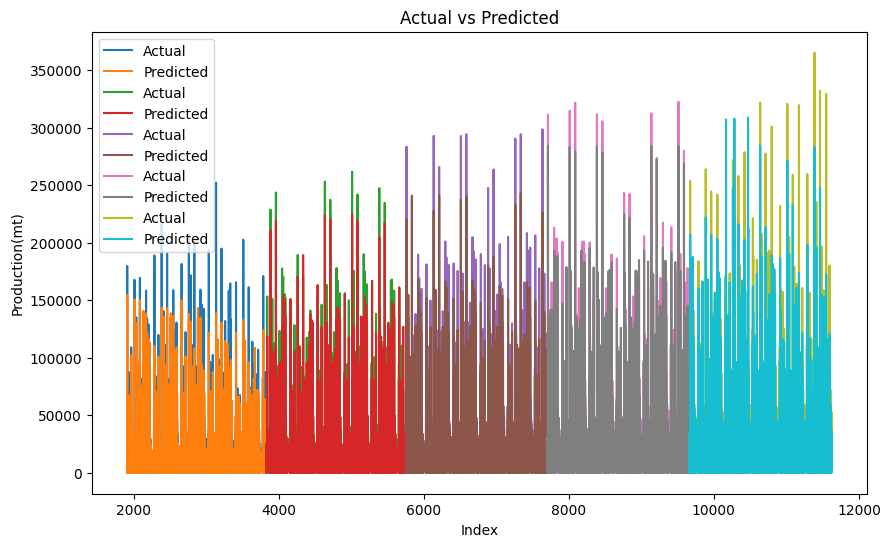

In [21]:
model = RandomForestRegressor(**best_params)

# Generate actual vs predicted graph
plt.figure(figsize=(10, 6))
for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    plt.plot(y_test.index, y_test.values, label='Actual')
    plt.plot(y_test.index, y_pred, label='Predicted')

plt.xlabel('Index')
plt.ylabel('Production(mt)')
plt.legend()
plt.title('Actual vs Predicted')
plt.show()